In [1]:
import pandas as pd
pd.set_option('display.max_columns', None)  # Show all columns
pd.set_option('display.width', None)  # Don't wrap lines

In [2]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

plt.style.use("default")


In [3]:
# Load the dataset
df = pd.read_csv("../data/raw/web_traffic_logs.csv",parse_dates=["timestamp"])

In [4]:
df.head(20)

,timestamp,user_id,session_id,page_url,ip_address,user_agent,referrer,time_on_page,scroll_depth,mouse_movements,form_interactions
0,2024-01-01 01:05:45,U0565,S000565,/home,247.200.72.9,Mozilla/5.0 (iPhone; CPU iPhone OS 14_6 like M...,google.com,101,80,69,0
1,2024-01-01 01:06:15,U0565,S000565,/search,247.200.72.9,Mozilla/5.0 (iPhone; CPU iPhone OS 14_6 like M...,/home,115,59,60,1
2,2024-01-01 01:06:45,U0565,S000565,/contact,247.200.72.9,Mozilla/5.0 (iPhone; CPU iPhone OS 14_6 like M...,/search,66,62,136,0
3,2024-01-01 01:07:15,U0565,S000565,/product/789,247.200.72.9,Mozilla/5.0 (iPhone; CPU iPhone OS 14_6 like M...,/contact,14,40,95,0
4,2024-01-01 01:07:45,U0565,S000565,/products,247.200.72.9,Mozilla/5.0 (iPhone; CPU iPhone OS 14_6 like M...,/product/789,32,50,178,0
5,2024-01-01 02:06:39,U0526,S000526,/home,241.220.40.237,Mozilla/5.0 (Macintosh; Intel Mac OS X 10_15_7...,google.com,58,93,124,0
6,2024-01-01 02:07:09,U0526,S000526,/category/electronics,241.220.40.237,Mozilla/5.0 (Macintosh; Intel Mac OS X 10_15_7...,/home,50,99,191,0
7,2024-01-01 02:07:39,U0526,S000526,/reviews,241.220.40.237,Mozilla/5.0 (Macintosh; Intel Mac OS X 10_15_7...,/category/electronics,44,42,83,0
8,2024-01-01 02:08:09,U0526,S000526,/checkout,241.220.40.237,Mozilla/5.0 (Macintosh; Intel Mac OS X 10_15_7...,/reviews,59,59,137,1
9,2024-01-01 02:08:39,U0526,S000526,/contact,241.220.40.237,Mozilla/5.0 (Macintosh; Intel Mac OS X 10_15_7...,/checkout,84,51,87,0


In [5]:
df.shape

(11214, 11)

In [6]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 11214 entries, 0 to 11213
Data columns (total 11 columns):
 #   Column             Non-Null Count  Dtype         
---  ------             --------------  -----         
 0   timestamp          11214 non-null  datetime64[ns]
 1   user_id            11214 non-null  object        
 2   session_id         11214 non-null  object        
 3   page_url           11214 non-null  object        
 4   ip_address         11214 non-null  object        
 5   user_agent         11214 non-null  object        
 6   referrer           11214 non-null  object        
 7   time_on_page       11214 non-null  int64         
 8   scroll_depth       11214 non-null  int64         
 9   mouse_movements    11214 non-null  int64         
 10  form_interactions  11214 non-null  int64         
dtypes: datetime64[ns](1), int64(4), object(6)
memory usage: 963.8+ KB


C:\Users\anuj1\AppData\Local\Temp\ipykernel_29956\1545687759.py:1: FutureWarning: 'H' is deprecated and will be removed in a future version, please use 'h' instead.
  df.set_index("timestamp").resample("1H").size().plot(


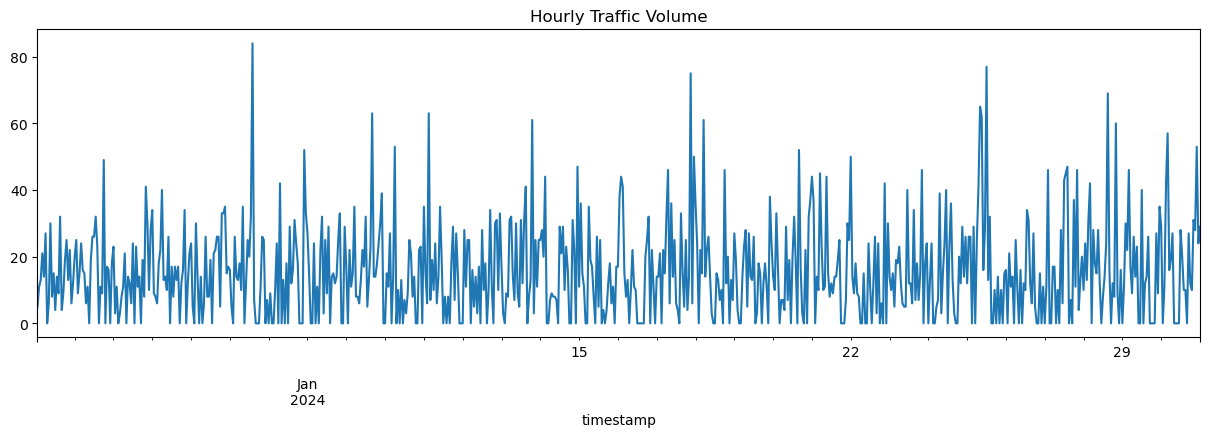

In [7]:
df.set_index("timestamp").resample("1H").size().plot(
    figsize=(15,4),
    title="Hourly Traffic Volume"
)
plt.show()



In [8]:
df["user_agent"].value_counts(normalize=True) * 100


user_agent
Mozilla/5.0 (Windows NT 10.0; Win64; x64) AppleWebKit/537.36                   20.875691
Mozilla/5.0 (Macintosh; Intel Mac OS X 10_15_7) AppleWebKit/537.36             20.465490
Mozilla/5.0 (iPad; CPU OS 14_6 like Mac OS X) AppleWebKit/605.1.15             18.655252
Mozilla/5.0 (iPhone; CPU iPhone OS 14_6 like Mac OS X) AppleWebKit/605.1.15    18.637418
Python-urllib/3.8                                                               5.029428
Scrapy/2.5.0                                                                    4.788657
curl/7.68.0                                                                     4.387373
bot-detector/1.0                                                                4.289281
Googlebot/2.1                                                                   2.871411
Name: proportion, dtype: float64

In [9]:
user_data = df[df['user_id'] == 'U0526']

In [10]:
# Filter data for just this user
user_data = df[df['user_id'] == 'U0526']

# Question 1: How many pages did they visit?
print(f"Total pages visited: {len(user_data)}")

# Question 2: What was their session duration?
# Hint: last timestamp - first timestamp
session_duration = user_data['timestamp'].max() - user_data['timestamp'].min()
print(f"Session duration: {session_duration}")

# Question 3: What's their average time per page?
avg_time = user_data['time_on_page'].mean()
print(f"Average time on page: {avg_time} seconds")

# Question 4: What's their average scroll depth?
avg_scroll = user_data['scroll_depth'].mean()
print(f"Average scroll depth: {avg_scroll}%")

# Question 5: What's their average mouse movements?
avg_mouse = user_data['mouse_movements'].mean()
print(f"Average mouse movements: {avg_mouse}")

# Question 6: Calculate their request speed
total_pages = len(user_data)
time_span_seconds = (user_data['timestamp'].max() - user_data['timestamp'].min()).total_seconds()
requests_per_sec = total_pages / time_span_seconds if time_span_seconds > 0 else 0
print(f"Requests per second: {requests_per_sec:.3f}")
print(time_span_seconds)
# Question 7: Look at all their data
print("\nAll page visits for U0526:")
print(user_data)

Total pages visited: 11
Session duration: 0 days 00:05:00
Average time on page: 78.9090909090909 seconds
Average scroll depth: 63.0%
Average mouse movements: 137.1818181818182
Requests per second: 0.037
300.0

All page visits for U0526:
             timestamp user_id session_id               page_url  \
5  2024-01-01 02:06:39   U0526    S000526                  /home   
6  2024-01-01 02:07:09   U0526    S000526  /category/electronics   
7  2024-01-01 02:07:39   U0526    S000526               /reviews   
8  2024-01-01 02:08:09   U0526    S000526              /checkout   
9  2024-01-01 02:08:39   U0526    S000526               /contact   
10 2024-01-01 02:09:09   U0526    S000526     /category/clothing   
11 2024-01-01 02:09:39   U0526    S000526           /product/123   
12 2024-01-01 02:10:09   U0526    S000526              /products   
13 2024-01-01 02:10:39   U0526    S000526                  /home   
14 2024-01-01 02:11:09   U0526    S000526              /products   
15 2024-01-01 0

In [ ]:
import pandas as pd

# Load data
df = pd.read_csv("../data/raw/web_traffic_logs.csv", parse_dates=["timestamp"])

# Calculate session-level features
session_features = df.groupby('session_id').agg({
    'page_url': 'count',
    'scroll_depth': 'mean',
    'mouse_movements': 'mean',
    'time_on_page': 'mean',
    'user_id': 'first',
    'timestamp': ['min', 'max']
})


# Flatten column names
session_features.columns = ['total_pages', 'avg_scroll_depth', 'avg_mouse_movements',
                            'avg_time_on_page', 'user_id', 'first_timestamp', 'last_timestamp']

# Calculate derived features
session_features['session_duration_sec'] = (
    session_features['last_timestamp'] - session_features['first_timestamp']
).dt.total_seconds()

session_features['requests_per_sec'] = session_features.apply(
    lambda row: row['total_pages'] / row['session_duration_sec'] if row['session_duration_sec'] > 0 else 0,
    axis=1
)

# Reset index to make session_id a column
session_features = session_features.reset_index()
session_features.to_csv("../processed/session_features_intermediate.csv", index=False)
# Look at results
print("Feature Engineering Complete!")
print(f"Total sessions: {len(session_features)}")
print("\nFirst 10 sessions:")
print(session_features.head(10))

# Find suspicious sessions
print("\n" + "="*50)
print("SUSPICIOUS SESSIONS (request_per_sec > 0.8):")
print("="*50)
suspicious = session_features[session_features['requests_per_sec'] > 0.8]
print(suspicious[['session_id', 'user_id', 'requests_per_sec', 'avg_scroll_depth', 'avg_mouse_movements']])

Feature Engineering Complete!
Total sessions: 1058

First 10 sessions:
  session_id  total_pages  avg_scroll_depth  avg_mouse_movements  \
0    S000001            4         56.250000            79.500000   
1    S000002           11         72.000000           125.454545   
2    S000003           13         74.461538           115.230769   
3    S000004           14         75.285714           129.428571   
4    S000005            4         80.750000            95.250000   
5    S000006           12         67.000000           110.833333   
6    S000007           14         67.428571           105.714286   
7    S000008            7         74.142857            88.857143   
8    S000009           11         72.000000            89.818182   
9    S000010            6         63.833333           117.833333   

   avg_time_on_page user_id     first_timestamp      last_timestamp  \
0        110.750000   U0001 2024-01-28 06:03:46 2024-01-28 06:05:16   
1         89.090909   U0002 2024-01-30

In [ ]:
#Add this to see distribution
print("\nRequest Speed Distribution:")
print(session_features['requests_per_sec'].describe())

# See how many of each user type
print("\nUser types in suspicious sessions:")
suspicious['user_type'] = suspicious['user_id'].str[0]  # Get first letter
print(suspicious['user_type'].value_counts())


Request Speed Distribution:
count    1058.000000
mean        0.122590
std         0.191503
min         0.035714
25%         0.036667
50%         0.040000
75%         0.060000
max         0.832193
Name: requests_per_sec, dtype: float64

User types in suspicious sessions:
user_type
B    1
Name: count, dtype: int64


C:\Users\anuj1\AppData\Local\Temp\ipykernel_12484\2301235176.py:7: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  suspicious['user_type'] = suspicious['user_id'].str[0]  # Get first letter


In [ ]:


# Step 1: Calculate scores for each signal
def calculate_bot_score(row):
    score = 0
    
    # Signal 1: Request Speed (50 points)
    if row['requests_per_sec'] > 0.8:
        score += 50
    elif row['requests_per_sec'] >= 0.3:
        score += 25
    
    # Signal 2: Scroll Depth (30 points)
    # For scroll depth:
    if row['avg_scroll_depth'] < 35:
        score += 30
    elif row['avg_scroll_depth'] < 50:
        score += 15

    # For mouse movements:
    if row['avg_mouse_movements'] < 15:
        score += 20
    elif row['avg_mouse_movements'] < 40:
        score += 10

    return score

# Apply scoring to all sessions
session_features['bot_score'] = session_features.apply(calculate_bot_score, axis=1)

# Classify based on score
session_features['classification'] = session_features['bot_score'].apply(
    lambda score: 'Bot' if score >= 61 else ('Suspicious' if score >= 31 else 'Human')
)

# Show results
print("\n" + "="*60)
print("BOT DETECTION RESULTS")
print("="*60)
print(session_features[['session_id', 'user_id', 'requests_per_sec', 
                        'avg_scroll_depth', 'avg_mouse_movements', 
                        'bot_score', 'classification']].head(20))

print("\n" + "="*60)
print("CLASSIFICATION SUMMARY")
print("="*60)
print(session_features['classification'].value_counts())

print("\n" + "="*60)
print("BOT SESSIONS (Score >= 61)")
print("="*60)
bots = session_features[session_features['classification'] == 'Bot']
print(bots[['session_id', 'user_id', 'requests_per_sec', 'avg_scroll_depth', 
            'avg_mouse_movements', 'bot_score']])


BOT DETECTION RESULTS
   session_id user_id  requests_per_sec  avg_scroll_depth  \
0     S000001   U0001          0.044444         56.250000   
1     S000002   U0002          0.036667         72.000000   
2     S000003   U0003          0.036111         74.461538   
3     S000004   U0004          0.035897         75.285714   
4     S000005   U0005          0.044444         80.750000   
5     S000006   U0006          0.036364         67.000000   
6     S000007   U0007          0.035897         67.428571   
7     S000008   U0008          0.038889         74.142857   
8     S000009   U0009          0.036667         72.000000   
9     S000010   U0010          0.040000         63.833333   
10    S000011   U0011          0.050000         74.000000   
11    S000012   U0012          0.041667         69.000000   
12    S000013   U0013          0.036111         74.692308   
13    S000014   U0014          0.037037         77.000000   
14    S000015   U0015          0.035714         70.066667   
1

In [ ]:
session_features["time_on_page"] = (session_features[('timestamp', 'max')] - session_features[('timestamp', 'min')]).dt.total_seconds()

In [ ]:
session_features.head()

session_id page_url scroll_depth mouse_movements time_on_page user_id  \
                count         mean            mean         mean   first   
0    S000001        4    56.250000       79.500000         90.0   U0001   
1    S000002       11    72.000000      125.454545        300.0   U0002   
2    S000003       13    74.461538      115.230769        360.0   U0003   
3    S000004       14    75.285714      129.428571        390.0   U0004   
4    S000005        4    80.750000       95.250000         90.0   U0005   

            timestamp                      
                  min                 max  
0 2024-01-28 06:03:46 2024-01-28 06:05:16  
1 2024-01-30 22:11:21 2024-01-30 22:16:21  
2 2024-01-09 22:12:34 2024-01-09 22:18:34  
3 2024-01-30 00:12:16 2024-01-30 00:18:46  
4 2024-01-10 14:02:13 2024-01-10 14:03:43

In [ ]:
session_features[session_features["avg_mouse_movements"]<0.03]

,total_pages_visited,avg_scroll_depth,avg_time_on_page,avg_mouse_movements
user_id,,,,
B0751,24,0.0,2.250000,0.0
B0752,17,0.0,2.235294,0.0
B0753,25,0.0,2.480000,0.0
B0754,12,0.0,3.000000,0.0
B0755,21,0.0,1.904762,0.0
...,...,...,...,...
B0879,11,0.0,3.090909,0.0
B0880,14,0.0,2.785714,0.0
B0881,25,0.0,2.240000,0.0


In [ ]:
# Calculate session duration
session_features['session_duration_sec'] = (
    session_features['last_timestamp'] - session_features['first_timestamp']
).dt.total_seconds()

# Calculate requests per second
session_features['requests_per_sec'] = session_features.apply(
    lambda row: row['total_pages'] / row['session_duration_sec'] if row['session_duration_sec'] > 0 else 0,
    axis=1
)

KeyError: 'last_timestamp'

In [ ]:
session_features[session_features["requests_per_sec"]>60]

session_id page_url scroll_depth mouse_movements time_on_page user_id  \
                  count         mean            mean         mean   first   
760    S000761       11          0.0             0.0    16.494965   B0761   
770    S000771       10          0.0             0.0    12.016438   B0771   
778    S000779       10          0.0             0.0    13.315299   B0779   
786    S000787       11          0.0             0.0    16.485784   B0787   
791    S000792       11          0.0             0.0    15.436496   B0792   
793    S000794       10          0.0             0.0    15.339903   B0794   
818    S000819       12          0.0             0.0    17.571236   B0819   
827    S000828       12          0.0             0.0    15.743397   B0828   
835    S000836       10          0.0             0.0    15.181572   B0836   
836    S000837       10          0.0             0.0    15.356757   B0837   
867    S000868       10          0.0             0.0    15.530021   B0868   
877    S000878       11          0.0             0.0    15.062004   B0878   

                     timestamp                            requests_per_sec  \
                           min                        max                    
760 2024-01-28 03:00:02.661663 2024-01-28 03:00:19.156628        64.140785   
770 2024-01-04 00:00:01.566568 2024-01-04 00:00:13.583006        88.046058   
778 2024-01-23 20:00:01.973593 2024-01-23 20:00:15.288892        79.457472   
786 2024-01-29 21:00:02.130387 2024-01-29 21:00:18.616171        64.176505   
791 2024-01-25 14:00:01.414187 2024-01-25 14:00:16.850683        68.538870   
793 2024-01-18 00:00:01.805749 2024-01-18 00:00:17.145652        68.970449   
818 2024-01-18 00:00:02.064842 2024-01-18 00:00:19.636078        60.212042   
827 2024-01-24 02:00:02.511106 2024-01-24 02:00:18.254503        67.202777   
835 2024-01-20 14:00:01.505542 2024-01-20 14:00:16.687114        69.689753   
836 2024-01-09 10:00:02.995750 2024-01-09 10:00:18.352507        68.894754   
867 2024-01-17 10:00:02.378236 2024-01-17 10:00:17.908257        68.126115   
877 2024-01-21 06:00:01.177030 2024-01-21 06:00:16.239034        70.242977   

        rps_z is_anomaly  
                          
760  4.295629          1  
770  6.223309          1  
778  5.530740          1  
786  4.298509          1  
791  4.650283          1  
793  4.685085          1  
818  3.978822          1  
827  4.542543          1  
835  4.743088          1  
836  4.678981          1  
867  4.616999          1  
877  4.787699          1

In [ ]:
sessions_per_ip = df.groupby('ip_address')['session_id'].nunique()
sessions_per_ip.sort_values(ascending=False).head(10)

ip_address
1.180.123.147      1
252.39.226.227     1
250.127.197.198    1
250.137.143.148    1
250.139.227.35     1
250.215.32.16      1
250.235.23.131     1
250.34.187.28      1
250.39.239.123     1
250.55.0.213       1
Name: session_id, dtype: int64

In [ ]:
from scipy.stats import zscore

session_features['rps_z'] = zscore(session_features['requests_per_sec'])
session_features['is_anomaly'] = (session_features['rps_z'] > 3).astype(int)


In [ ]:
session_features[session_features["is_anomaly"]==1]

session_id page_url scroll_depth mouse_movements time_on_page user_id  \
                  count         mean            mean         mean   first   
753    S000754       12          0.0             0.0    21.323605   B0754   
760    S000761       11          0.0             0.0    16.494965   B0761   
764    S000765       15          0.0             0.0    21.664336   B0765   
769    S000770       13          0.0             0.0    19.432222   B0770   
770    S000771       10          0.0             0.0    12.016438   B0771   
778    S000779       10          0.0             0.0    13.315299   B0779   
780    S000781       13          0.0             0.0    21.377510   B0781   
786    S000787       11          0.0             0.0    16.485784   B0787   
788    S000789       12          0.0             0.0    18.058343   B0789   
791    S000792       11          0.0             0.0    15.436496   B0792   
793    S000794       10          0.0             0.0    15.339903   B0794   
798    S000799       12          0.0             0.0    20.272529   B0799   
801    S000802       14          0.0             0.0    20.545911   B0802   
818    S000819       12          0.0             0.0    17.571236   B0819   
827    S000828       12          0.0             0.0    15.743397   B0828   
828    S000829       14          0.0             0.0    21.940113   B0829   
831    S000832       12          0.0             0.0    19.916022   B0832   
835    S000836       10          0.0             0.0    15.181572   B0836   
836    S000837       10          0.0             0.0    15.356757   B0837   
856    S000857       12          0.0             0.0    19.769725   B0857   
863    S000864       13          0.0             0.0    17.989074   B0864   
866    S000867       13          0.0             0.0    21.693349   B0867   
867    S000868       10          0.0             0.0    15.530021   B0868   
871    S000872       14          0.0             0.0    17.905885   B0872   
875    S000876       11          0.0             0.0    19.455315   B0876   
877    S000878       11          0.0             0.0    15.062004   B0878   
878    S000879       11          0.0             0.0    18.609001   B0879   
879    S000880       14          0.0             0.0    19.511093   B0880   

                     timestamp                            requests_per_sec  \
                           min                        max                    
753 2024-01-29 14:00:00.808007 2024-01-29 14:00:22.131612        49.616376   
760 2024-01-28 03:00:02.661663 2024-01-28 03:00:19.156628        64.140785   
764 2024-01-21 10:00:02.286339 2024-01-21 10:00:23.950675        48.836022   
769 2024-01-20 08:00:00.994831 2024-01-20 08:00:20.427053        54.445652   
770 2024-01-04 00:00:01.566568 2024-01-04 00:00:13.583006        88.046058   
778 2024-01-23 20:00:01.973593 2024-01-23 20:00:15.288892        79.457472   
780 2024-01-22 21:00:00.822053 2024-01-22 21:00:22.199563        49.491264   
786 2024-01-29 21:00:02.130387 2024-01-29 21:00:18.616171        64.176505   
788 2024-01-26 11:00:02.606847 2024-01-26 11:00:20.665190        58.587878   
791 2024-01-25 14:00:01.414187 2024-01-25 14:00:16.850683        68.538870   
793 2024-01-18 00:00:01.805749 2024-01-18 00:00:17.145652        68.970449   
798 2024-01-29 07:00:01.789831 2024-01-29 07:00:22.062360        52.188851   
801 2024-01-11 09:00:02.577905 2024-01-11 09:00:23.123816        51.494431   
818 2024-01-18 00:00:02.064842 2024-01-18 00:00:19.636078        60.212042   
827 2024-01-24 02:00:02.511106 2024-01-24 02:00:18.254503        67.202777   
828 2024-01-14 00:00:01.635752 2024-01-14 00:00:23.575865        48.222176   
831 2024-01-27 13:00:02.510046 2024-01-27 13:00:22.426068        53.123058   
835 2024-01-20 14:00:01.505542 2024-01-20 14:00:16.687114        69.689753   
836 2024-01-09 10:00:02.995750 2024-01-09 10:00:18.352507        68.894754   
856 2024-01-28 20:00:00.746316 2024-01-28 20:00:20.5160

In [ ]:
print(session_features.columns)  # Show me all column names

Index(['session_id', 'total_pages', 'avg_scroll_depth', 'avg_mouse_movements',
       'avg_time_on_page', 'user_id', 'first_timestamp', 'last_timestamp',
       'session_duration_sec', 'requests_per_sec', 'bot_score',
       'classification'],
      dtype='object')


In [ ]:
print("\n" + "="*60)
print("DETAILED BOT ANALYSIS")
print("="*60)

# Check what types of users were flagged as bots
bots = session_features[session_features['classification'] == 'Bot']
print(f"\nTotal bots detected: {len(bots)}")

# Get the first letter of user_id to see user types
bots['user_type'] = bots['user_id'].str[0]
print("\nBot detections by user type:")
print(bots['user_type'].value_counts())
print("  U = Human (FALSE POSITIVE ❌)")
print("  B = Crude Bot (CORRECT ✅)")
print("  M = Medium Bot (CORRECT ✅)")
print("  A = Advanced Bot (CORRECT ✅)")

# Show some examples of detected bots
print("\n--- SAMPLE OF DETECTED BOTS ---")
print(bots[['user_id', 'requests_per_sec', 'avg_scroll_depth', 
            'avg_mouse_movements', 'bot_score']].head(10))

# Check the suspicious one
print("\n" + "="*60)
print("THE SUSPICIOUS SESSION")
print("="*60)
suspicious = session_features[session_features['classification'] == 'Suspicious']
print(suspicious[['user_id', 'requests_per_sec', 'avg_scroll_depth', 
                  'avg_mouse_movements', 'bot_score']])

# Calculate accuracy
print("\n" + "="*60)
print("ACCURACY CHECK")
print("="*60)
# Ground truth: B, M, A are bots. U are humans.
session_features['actual_bot'] = session_features['user_id'].str[0].isin(['B', 'M', 'A'])
session_features['predicted_bot'] = session_features['classification'].isin(['Bot', 'Suspicious'])

# True positives: Correctly identified bots
true_positives = ((session_features['actual_bot'] == True) & 
                  (session_features['predicted_bot'] == True)).sum()

# False positives: Humans wrongly flagged as bots
false_positives = ((session_features['actual_bot'] == False) & 
                   (session_features['predicted_bot'] == True)).sum()

# False negatives: Bots that we missed
false_negatives = ((session_features['actual_bot'] == True) & 
                   (session_features['predicted_bot'] == False)).sum()

# True negatives: Correctly identified humans
true_negatives = ((session_features['actual_bot'] == False) & 
                  (session_features['predicted_bot'] == False)).sum()

print(f"True Positives (Correctly caught bots): {true_positives}")
print(f"False Positives (Humans wrongly flagged): {false_positives}")
print(f"False Negatives (Bots we missed): {false_negatives}")
print(f"True Negatives (Correctly identified humans): {true_negatives}")

# Calculate metrics
precision = true_positives / (true_positives + false_positives) if (true_positives + false_positives) > 0 else 0
recall = true_positives / (true_positives + false_negatives) if (true_positives + false_negatives) > 0 else 0
accuracy = (true_positives + true_negatives) / len(session_features)

print(f"\n📊 PERFORMANCE METRICS:")
print(f"Precision: {precision:.2%} (Of flagged bots, how many were real bots?)")
print(f"Recall: {recall:.2%} (Of all real bots, how many did we catch?)")
print(f"Accuracy: {accuracy:.2%} (Overall correctness)")


DETAILED BOT ANALYSIS

Total bots detected: 133

Bot detections by user type:
user_type
B    133
Name: count, dtype: int64
  U = Human (FALSE POSITIVE ❌)
  B = Crude Bot (CORRECT ✅)
  M = Medium Bot (CORRECT ✅)
  A = Advanced Bot (CORRECT ✅)

--- SAMPLE OF DETECTED BOTS ---
    user_id  requests_per_sec  avg_scroll_depth  avg_mouse_movements  \
750   B0751          0.663747               0.0                  0.0   
751   B0752          0.636453               0.0                  0.0   
752   B0753          0.587019               0.0                  0.0   
753   B0754          0.562757               0.0                  0.0   
754   B0755          0.543327               0.0                  0.0   
755   B0756          0.628578               0.0                  0.0   
756   B0757          0.640579               0.0                  0.0   
757   B0758          0.585064               0.0                  0.0   
758   B0759          0.552256               0.0                  0.0   
759 

C:\Users\anuj1\AppData\Local\Temp\ipykernel_12484\1956650440.py:10: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  bots['user_type'] = bots['user_id'].str[0]


In [ ]:
print("\n" + "="*60)
print("ANALYZING THE BOTS WE MISSED")
print("="*60)

# Get all actual bots
actual_bots = session_features[session_features['user_id'].str[0].isin(['B', 'M', 'A'])]

# Separate caught vs missed
caught_bots = actual_bots[actual_bots['classification'].isin(['Bot', 'Suspicious'])]
missed_bots = actual_bots[actual_bots['classification'] == 'Human']

print(f"\nTotal real bots: {len(actual_bots)}")
print(f"Caught: {len(caught_bots)}")
print(f"Missed: {len(missed_bots)}")

# What types did we miss?
print("\n--- MISSED BOTS BY TYPE ---")
missed_bots['user_type'] = missed_bots['user_id'].str[0]
print(missed_bots['user_type'].value_counts())

# Compare caught vs missed bots
print("\n" + "="*60)
print("CAUGHT BOTS - Statistics")
print("="*60)
print(caught_bots[['requests_per_sec', 'avg_scroll_depth', 'avg_mouse_movements']].describe())

print("\n" + "="*60)
print("MISSED BOTS - Statistics")
print("="*60)
print(missed_bots[['requests_per_sec', 'avg_scroll_depth', 'avg_mouse_movements']].describe())

# Show examples of missed bots
print("\n" + "="*60)
print("SAMPLE OF MISSED BOTS")
print("="*60)
print(missed_bots[['user_id', 'requests_per_sec', 'avg_scroll_depth', 
                   'avg_mouse_movements', 'bot_score']].head(10))


ANALYZING THE BOTS WE MISSED

Total real bots: 308
Caught: 134
Missed: 174

--- MISSED BOTS BY TYPE ---
user_type
M    124
A     50
Name: count, dtype: int64

CAUGHT BOTS - Statistics
       requests_per_sec  avg_scroll_depth  avg_mouse_movements
count        134.000000        134.000000           134.000000
mean           0.615407          0.111007             0.106343
std            0.074546          1.285004             1.231013
min            0.137931          0.000000             0.000000
25%            0.572280          0.000000             0.000000
50%            0.615549          0.000000             0.000000
75%            0.663999          0.000000             0.000000
max            0.832193         14.875000            14.250000

MISSED BOTS - Statistics
       requests_per_sec  avg_scroll_depth  avg_mouse_movements
count        174.000000        174.000000           174.000000
mean           0.102631         35.594790            20.830448
std            0.032237         1

C:\Users\anuj1\AppData\Local\Temp\ipykernel_12484\1072125269.py:18: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  missed_bots['user_type'] = missed_bots['user_id'].str[0]
